In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [2]:
# Data import and transformation

movies = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies = movies.merge(credits,on='title')


movies_feature_set = movies[['id','title','keywords','genres','cast','popularity','vote_average','vote_count']]
movies_feature_set.dropna(inplace=True)
movies_feature_set.head()



/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,title,keywords,genres,cast,popularity,vote_average,vote_count
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",139.082615,6.9,4500
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",107.376788,6.3,4466
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",112.312950,7.6,9106
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",43.926995,6.1,2124


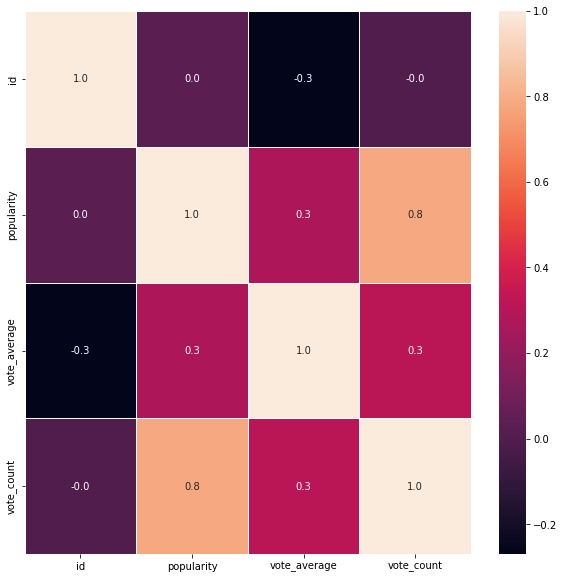

In [3]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(movies_feature_set.corr(), annot = True, linewidths=.5, fmt = '.1f', ax = ax)
plt.show()

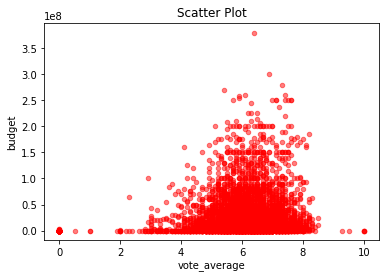

In [4]:
movies.plot(kind='scatter', x='vote_average', y='budget', alpha=.5, color='r')
plt.xlabel('vote_average')
plt.ylabel('budget')
plt.title('Scatter Plot')
plt.show()

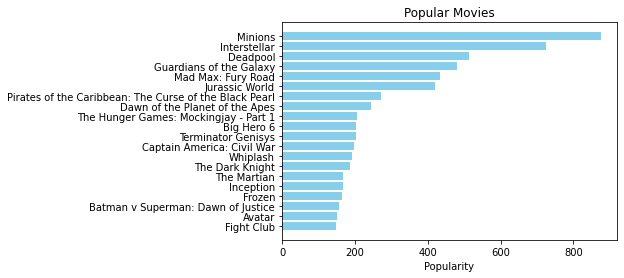

In [5]:
sorted_movies = movies_feature_set.sort_values('popularity' , ascending=False)
sorted_movies.head(3)

def horizontal_bar():
  plt.title("Movie With Popularity")
  plt.barh(sorted_movies['title'].head(20),sorted_movies['popularity'].head(20), align='center',
          color='skyblue')
  plt.gca().invert_yaxis()
  plt.xlabel("Popularity",fontsize=10)
  plt.title("Popular Movies")
    
horizontal_bar()

In [6]:


def convert(text):
    arr = []
    for i in ast.literal_eval(text):
        arr.append(i['name'])
    
    return arr

movies_feature_set['genres'] = movies['genres'].apply(convert)


def convert_keyword_top3(text):
    arr= []
    count = 0
    for i in ast.literal_eval(text):
        if count<3:
            arr.append(i['name'])
            count+=1
    return arr   

movies_feature_set['keywords'] = movies['keywords'].apply(convert_keyword_top3)

def convert_cast_top2(text):
    arr= []
    count = 0
    for i in ast.literal_eval(text):
        if count<2:
            arr.append(i['name'])
            count+=1
    return arr        
movies_feature_set['cast'] = movies['cast'].apply(convert_cast_top2)
movies_feature_set['tags'] = movies_feature_set['keywords'] + movies_feature_set['genres'] + movies_feature_set['cast']
new_df = movies_feature_set[['id','title','tags']]
new_df.head(5)




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,id,title,tags
0,19995,Avatar,"[culture clash, future, space war, Action, Adv..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, Adventure, ..."
2,206647,Spectre,"[spy, based on novel, secret agent, Action, Ad..."
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, Action, ..."
4,49529,John Carter,"[based on novel, mars, medallion, Action, Adve..."


In [7]:
# Convert to tags to string format

new_df['tags'] = movies_feature_set['tags'].apply(lambda x: " ".join(x))
new_df.head(3)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,title,tags
0,19995,Avatar,culture clash future space war Action Adventur...
1,285,Pirates of the Caribbean: At World's End,ocean drug abuse exotic island Adventure Fanta...
2,206647,Spectre,spy based on novel secret agent Action Adventu...


In [8]:
new_df['tags'][0]

'culture clash future space war Action Adventure Fantasy Science Fiction Sam Worthington Zoe Saldana'

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# remove commmon stop words from tags column 
tfidf = TfidfVectorizer(stop_words='english')
new_df['overview'] = new_df['tags'].fillna('')
tfidf_matrix = tfidf.fit_transform(new_df['tags'])

tfidf_matrix.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(4809, 7526)

In [10]:
from sklearn.metrics.pairwise import linear_kernel

# cosine similarity for matrix factorization 
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(new_df.index, index=new_df['title']).drop_duplicates()

indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [11]:
# Function that takes in movie title as input and outputs most similar movies
def movie_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    # pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting of movies based on similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return new_df['title'].iloc[movie_indices]




In [12]:
movie_recommendations('Spectre')

29                              Skyfall
11                    Quantum of Solace
354     The Girl with the Dragon Tattoo
287                    Django Unchained
3052                           Big Eyes
Name: title, dtype: object

Movie Genre Prediction Using Natural Language Processing (NLP)

In [13]:
movies_v2 = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits_v2 = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies_v2 = movies_v2.merge(credits_v2,on='title')


movies_clean = movies_v2[['title','keywords','cast','popularity','overview','genres']]
movies_clean.dropna(inplace=True)
movies_clean.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,title,keywords,cast,popularity,overview,genres
0,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",150.437577,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",139.082615,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",107.376788,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",112.312950,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",43.926995,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [14]:
def convert(text):
    arr = []
    count = 0
    for i in ast.literal_eval(text):
         if count<1:
            arr.append(i['name'])
            count+=1
    return arr

movies_clean['genres'] = movies_v2['genres'].apply(convert)

movies_clean['genres'] = movies_clean['genres'].apply(lambda x: " ".join(x))


movies_summary = movies_clean[['title','overview','genres']]
movies_summary = movies_summary.dropna(subset=['title','overview','genres'])

movies_summary.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure
2,Spectre,A cryptic message from Bond’s past sends him o...,Action
3,The Dark Knight Rises,Following the death of District Attorney Harve...,Action
4,John Carter,"John Carter is a war-weary, former military ca...",Action


In [15]:
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [16]:

movies_summary['clean_tag'] = movies_summary['overview'].apply(lambda x: clean_text(x))

In [17]:


movies_summary_clean = movies_summary[['title','clean_tag','genres']]
movies_summary_clean.head()



,title,clean_tag,genres
0,Avatar,in the nd century a paraplegic marine is dispa...,Action
1,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,Adventure
2,Spectre,a cryptic message from bond s past sends him o...,Action
3,The Dark Knight Rises,following the death of district attorney harve...,Action
4,John Carter,john carter is a war weary former military cap...,Action


In [18]:
movies_summary_clean['genres'].value_counts()

Drama              1208
Comedy             1042
Action              755
Adventure           339
Horror              301
Crime               195
Thriller            194
Animation           123
Fantasy             118
Romance             106
Science Fiction      96
Documentary          87
Family               57
Mystery              41
Music                34
                     28
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

In [19]:

movies_summary_clean['genres'].value_counts()[:10].index.tolist()

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Horror',
 'Crime',
 'Thriller',
 'Animation',
 'Fantasy',
 'Romance']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Movie Genre Count Plot')

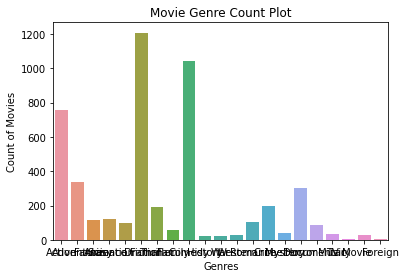

In [20]:
sns.countplot(movies_summary_clean['genres'])
plt.xlabel("Genres")
plt.ylabel("Count of Movies")
plt.title("Movie Genre Count Plot")

In [21]:
for i in movies_summary_clean.columns:
    #prinfting unique values
    print(i ,':', len(movies_summary_clean[i].unique()))

title : 4797
clean_tag : 4800
genres : 21


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(movies_summary_clean['clean_tag'],movies_summary_clean['genres'],test_size=0.2,shuffle=True)


In [23]:
#Tf-Idf

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

X_train_vectors_tfidf.shape

(3844, 19339)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score



#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  


#Predict y value for test dataset
y_predict_tfidf = nb_tfidf.predict(X_test_vectors_tfidf)


 

In [25]:
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_predict_tfidf))

                 precision    recall  f1-score   support

                      0.00      0.00      0.00         3
         Action       0.49      0.13      0.21       158
      Adventure       0.00      0.00      0.00        72
      Animation       0.00      0.00      0.00        22
         Comedy       0.43      0.41      0.42       208
          Crime       0.00      0.00      0.00        41
    Documentary       0.00      0.00      0.00        16
          Drama       0.32      0.90      0.47       251
         Family       0.00      0.00      0.00         8
        Fantasy       0.00      0.00      0.00        26
        Foreign       0.00      0.00      0.00         1
        History       0.00      0.00      0.00         6
         Horror       0.00      0.00      0.00        53
          Music       0.00      0.00      0.00         5
        Mystery       0.00      0.00      0.00         8
        Romance       0.00      0.00      0.00        20
Science Fiction       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Model Accuracy Score: 32.43%

In [26]:
# Model Testing: Logistic Regression

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)

print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

                      0.00      0.00      0.00         3
         Action       0.44      0.55      0.49       158
      Adventure       0.47      0.24      0.31        72
      Animation       1.00      0.09      0.17        22
         Comedy       0.44      0.63      0.52       208
          Crime       0.25      0.02      0.04        41
    Documentary       0.50      0.06      0.11        16
          Drama       0.43      0.63      0.51       251
         Family       1.00      0.12      0.22         8
        Fantasy       0.50      0.08      0.13        26
        Foreign       0.00      0.00      0.00         1
        History       0.00      0.00      0.00         6
         Horror       0.47      0.30      0.37        53
          Music       0.00      0.00      0.00         5
        Mystery       0.00      0.00      0.00         8
        Romance       0.00      0.00      0.00        20
Science Fiction       0.50    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model Accuracy Score: 40.23%

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", min_samples_split = 5, random_state = 5)

clf.fit(X_train_vectors_tfidf, y_train)

RandomForestClassifier(min_samples_split=5, random_state=5)

In [28]:
# Model Testing: Random Forest

y_pred = clf.predict(X_test_vectors_tfidf)
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

                      0.00      0.00      0.00         3
         Action       0.40      0.35      0.38       158
      Adventure       0.00      0.00      0.00        72
      Animation       0.00      0.00      0.00        22
         Comedy       0.33      0.44      0.38       208
          Crime       0.00      0.00      0.00        41
    Documentary       0.33      0.06      0.11        16
          Drama       0.34      0.73      0.47       251
         Family       1.00      0.12      0.22         8
        Fantasy       1.00      0.04      0.07        26
        Foreign       0.00      0.00      0.00         1
        History       0.00      0.00      0.00         6
         Horror       0.67      0.04      0.07        53
          Music       0.00      0.00      0.00         5
        Mystery       0.00      0.00      0.00         8
        Romance       0.00      0.00      0.00        20
Science Fiction       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier Model Accuracy Score: 33.16%